# Imports

In [2]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy.random import normal, uniform
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression


import dill

In [3]:
%matplotlib inline

In [4]:
# dill.dump_session('CDC_F.db')

In [5]:
# dill.load_session('CDC_F.db')

In [6]:
SEED = 73 # random seed

# Data reading

In [29]:
y_train = pd.read_csv('data/prepared/y_train.csv')
y_test = pd.read_csv('data/prepared/y_test.csv')

X_train_standartized = pd.read_csv('data/prepared/X_train_std.csv')
X_test_standartized = pd.read_csv('data/prepared/X_test_std.csv')

current_target = y_train.columns[0]

y_train = y_train.values.reshape(len(y_train))
y_test = y_test.values.reshape(len(y_test))

In [54]:
data = pd.read_csv('data/prepared/data_processed.csv')

In [61]:
nms = data.columns
nms

Index(['AP1', 'FD', 'FTa1', 'FTa2', 'FTa3', 'FTb', 'FTc', 'LFY', 'TFL1a',
       'TFL1c'],
      dtype='object')

In [59]:
current_target = nms[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(current_target, axis = 1), data[current_target],
                                                    test_size = 0.25, random_state=SEED, shuffle=True)

In [ ]:
def standartize_train_test(X_train, X_test):
    st_scaler = StandardScaler()
    
    standartized_train = st_scaler.fit_transform(X_train.values)
    standartized_test = st_scaler.transform(X_test.values)
    
    standartized_train = pd.DataFrame(standartized_train, columns=X_train.columns)
    standartized_test = pd.DataFrame(standartized_test, columns=X_test.columns)
    
    return standartized_train, standartized_test, st_scaler

In [ ]:
X_train_standartized, X_test_standartized, st_scaler = standartize_train_test(X_train, X_test)

# Linear model

## Model building

In [35]:
linear_model = LinearRegression()

In [36]:
linear_model.fit(X_train_standartized, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predictions on train

In [37]:
train_pred = linear_model.predict(X_train_standartized)

In [38]:
def comparsion_plot(true_values, predictions, data_type = 'test', current_target='AP1'):
    plt.scatter(true_values, predictions)
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r')
    plt.xlabel('True Values' + ' (' + current_target + ')')
    plt.ylabel('Predictions' + ' (' + current_target + ')')
    plt.axis('equal')
    plt.axis('square')
    plt.title('Predictions on ' + data_type)
#     plt.xlim(min(true_values) -10, max(true_values)+10)
#     plt.ylim(min(true_values) -10, max(true_values)+10)
    plt.show()
# plt.xlim([0,3])
# plt.ylim([0,3])

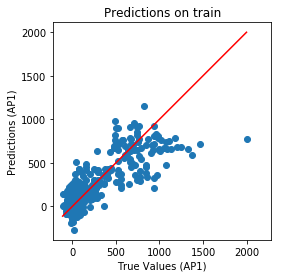

In [39]:
comparsion_plot(y_train, train_pred, data_type='train')

In [47]:
def print_metrics(true_val, predicted_val):
    print('r =', np.corrcoef(true_val, predicted_val)[0,1].round(3))
    print('MSE =', mean_squared_error(true_val, predicted_val).round(3))
    print('R2 =', r2_score(true_val, predicted_val).round(3))

In [48]:
print_metrics(train_pred, y_train)

r = 0.826
MSE = 23817.087
R2 = 0.536


## Predictions on test

In [50]:
predictions = linear_model.predict(X_test_standartized)

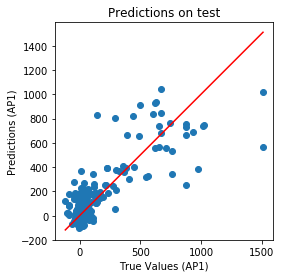

In [51]:
comparsion_plot(y_test, predictions, data_type='test')

In [52]:
print_metrics(predictions, y_test)

r = 0.813
MSE = 24276.554
R2 = 0.58
